In [316]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [317]:
df = pd.read_csv("/Users/periyzat/Documents/Study/Programming/MLCodebasics/13/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


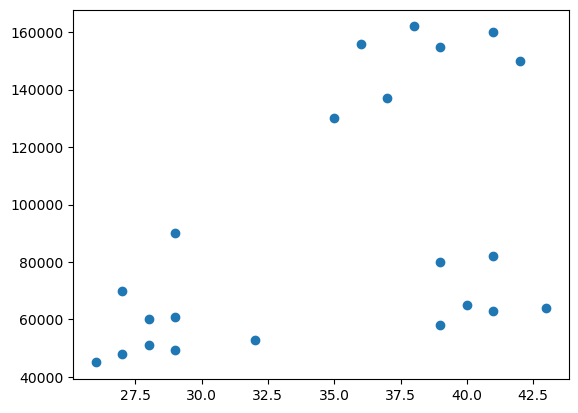

In [318]:
plt.scatter(df["Age"], df["Income($)"])

In [328]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [329]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/Users/periyzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [330]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


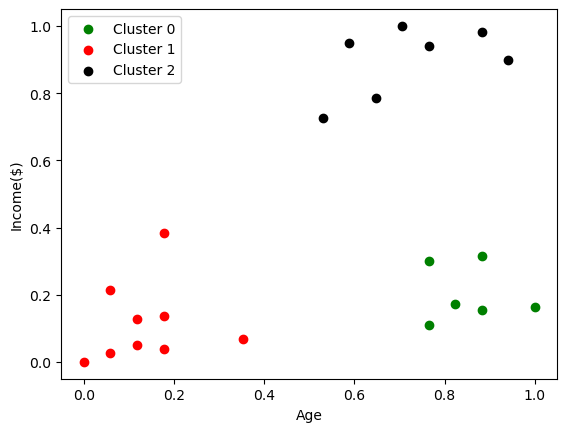

In [331]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'], color='red',label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'], color='black',label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
# In the next scatter plot we can see that we have black dots which doesn't belong to it's cluster
# it is because of the "Age" and "Income"'scaling part
# to make it smaller we use "MinMaxScaler()" function

In [332]:
scaler = MinMaxScaler()
# MinMaxScaler is a preprocessing technique used to scale numerical features in a way that they are transformed 
# to a specific range, typically between 0 and 1. 
# But in this version of Jupiter it is doing it automatically as we can know it from above scatter plot.
scaler.fit(df[['Income($)']])  
df['Income($)'] = scaler.transform(df[['Income($)']])  

# now we will make the scaling for "Age" column also
scaler.fit(df[['Age']])  
df['Age'] = scaler.transform(df[['Age']])  
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [333]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

/Users/periyzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [334]:
km.cluster_centers_ # centroids of every cluster with (x,y) value

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

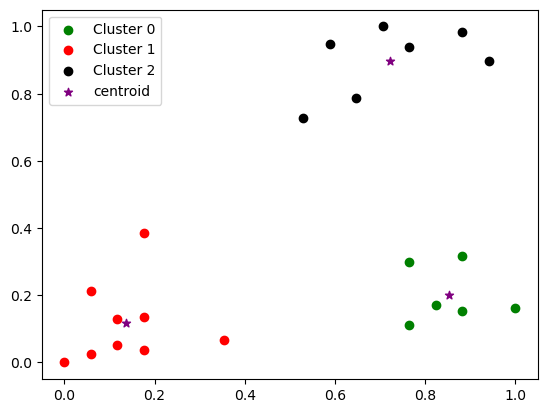

In [335]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'], color='red',label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'], color='black',label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
# km.cluster_centers_[:,0] - goes throug every x value-[:,0] of the "km.cluster_centers_" array and y value-[:,1]
plt.legend()

In [336]:
# now it's clustered well

In [348]:
k_rng = range(1,10) # the range we want to test our k
sse = [] # sum of square error
for k in k_rng:
    km = KMeans(n_clusters=k,n_init=10)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) # "inertia_" gives the sum of square error

In [349]:
sse

[5.434011511988177,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2664030124668415,
 0.21055478995472487,
 0.16869711728567785,
 0.1378188013376402,
 0.10188787724979426]

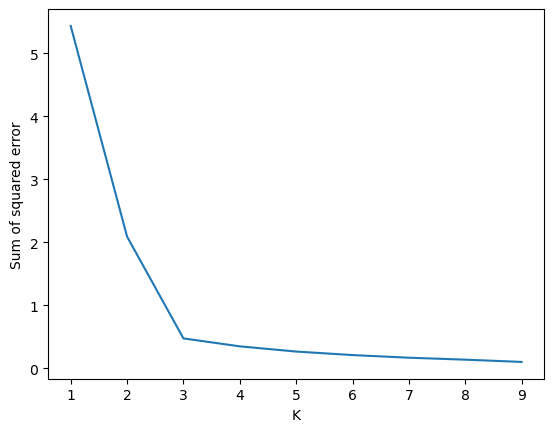

In [350]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)